<a href="https://colab.research.google.com/github/jmattew/GOAT-stuff/blob/master/Transit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # import numpy
import matplotlib.pyplot as plt # import matplotlib for graphs
import astropy.units as u # import astropy units
import astropy.constants as ac # import astropy constants

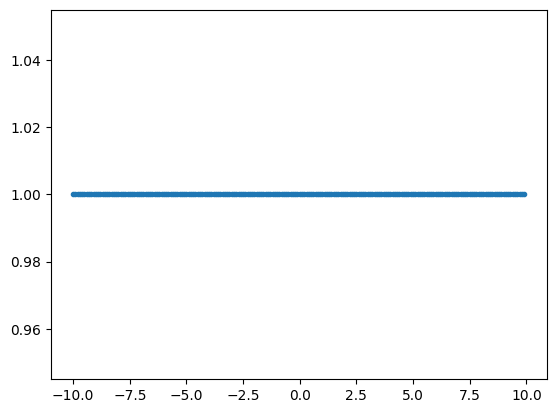

In [2]:
time_arr = np.arange(-10,10, 0.1) * u.hour #create a time array that ranges from -10 to 10
flux_arr = np.zeros(np.shape(time_arr)) + 1.0 # create a flux array for the drop in light we see from a star when a planet goes in front of it
plt.plot(time_arr,flux_arr, linestyle="--", marker=".") # plot the time and flux line(no transit)

In [3]:
tau = 2.0 * u.hour # used for end time
t_0 = 1.0 * u.hour # used for start time
time_start = t_0 - tau/2 # get the start time of the transit
time_end = t_0 + tau/2 # get the end time of the transit
print(time_start,time_end) # print out the start and end times
#time_mask = (time_arr > time_start) & (time_arr < time_end)

0.0 h 2.0 h


In [4]:
for i in range(len(time_arr)): # create for loop to print out the data in the time array
    print("index = ", i,"value = ", time_arr[i])

index =  0 value =  -10.0 h
index =  1 value =  -9.9 h
index =  2 value =  -9.8 h
index =  3 value =  -9.700000000000001 h
index =  4 value =  -9.600000000000001 h
index =  5 value =  -9.500000000000002 h
index =  6 value =  -9.400000000000002 h
index =  7 value =  -9.300000000000002 h
index =  8 value =  -9.200000000000003 h
index =  9 value =  -9.100000000000003 h
index =  10 value =  -9.000000000000004 h
index =  11 value =  -8.900000000000004 h
index =  12 value =  -8.800000000000004 h
index =  13 value =  -8.700000000000005 h
index =  14 value =  -8.600000000000005 h
index =  15 value =  -8.500000000000005 h
index =  16 value =  -8.400000000000006 h
index =  17 value =  -8.300000000000006 h
index =  18 value =  -8.200000000000006 h
index =  19 value =  -8.100000000000007 h
index =  20 value =  -8.000000000000007 h
index =  21 value =  -7.9000000000000075 h
index =  22 value =  -7.800000000000008 h
index =  23 value =  -7.700000000000008 h
index =  24 value =  -7.6000000000000085 h

In [5]:
ind = np.where((time_arr >= time_start) & (time_arr <= time_end)) # find and print all the indices in the time array that are between the start and end times
print(time_arr[ind])

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2. ] h


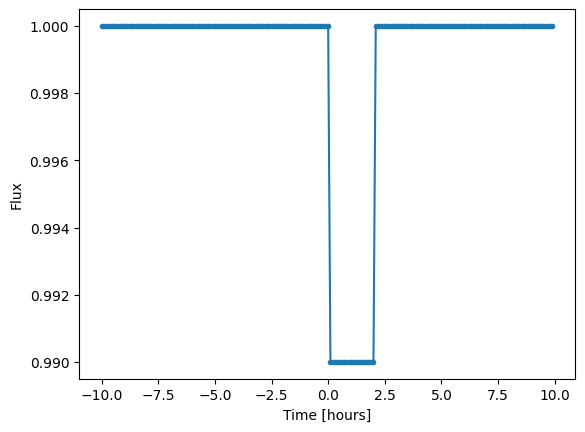

In [6]:
delta = 0.01 # delta variable to represent the change in light received from the star
flux_arr[ind] = 1.0 - delta # during the transit the amount of light received from the star will drop by delta
plt.plot(time_arr, flux_arr, linestyle="-",marker=".") # plot the flux and time data
plt.xlabel("Time [hours]") # x-axis
plt.ylabel("Flux") # y-axis
plt.show() #show the graph

In [7]:
def generate_transit_lightcurve(time_arr, t_0, tau, delta): # method that creates and returns a flux array based on different inputs for tau and delta
  flux_arr = np.zeros(np.shape(time_arr)) + 1.0 # create the array
  time_start = t_0 - tau/2 # create start time for transit
  time_end = t_0 + tau/2 # create end time of transit
  ind = np.where((time_arr >= time_start) & (time_arr <= time_end)) # get the times in the flux array between start and end time
  flux_arr[ind] = 1.0 - delta # subtract the flux values by the delta value
  return flux_arr # return the flux array

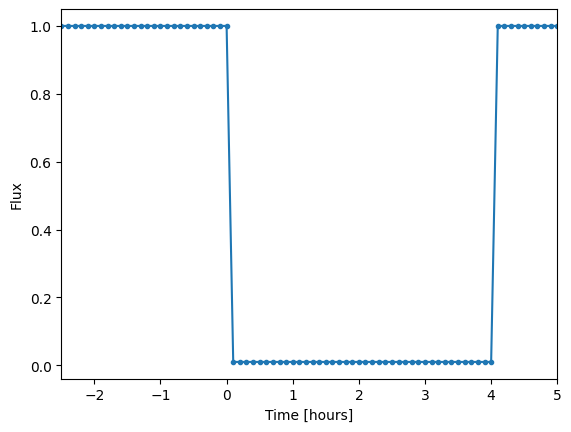

In [8]:
time_arr = np.arange(-10,10, 0.1) * u.hour # create a time array
tau = 4.0 * u.hour # set a tau value
t_0 = 2.0 * u.hour # set a t_0 value
delta = 0.99 # set a delta value

flux_arr = generate_transit_lightcurve(time_arr, t_0, tau, delta) # pass the values to the generate_transit_lightcurve method
plt.plot(time_arr, flux_arr, linestyle="-",marker=".") # plot the flux and time array
plt.xlabel("Time [hours]") # x-axis label
plt.ylabel("Flux") #y-axis label
plt.xlim(-2.5,5.0) #x-axis limits
plt.show() # show the graph

In [9]:
from google.colab import files# allow for file upload to use other data
uploaded = files.upload()

Saving gj436b.tbl to gj436b.tbl


In [10]:
import astropy.io.ascii # import ascii so we can read data
det = astropy.io.ascii.read("gj436b.tbl")
det

set,HJD,Relative_Flux
int64,float64,float64
0,2454280.6858131,0.99858714
0,2454280.6861306,0.99893544
0,2454280.6864482,1.0005495
0,2454280.6867663,0.9992087
0,2454280.6870839,0.9999951
0,2454280.6873985,0.99963366
0,2454280.6877158,0.99984715
0,2454280.6880337,0.99940892
0,2454280.6883513,1.0007346


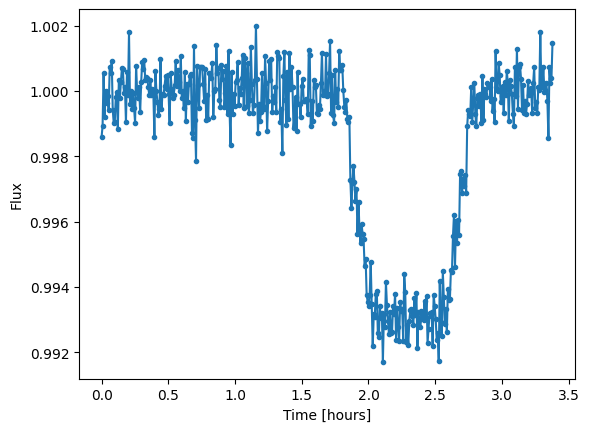

In [11]:
time_obs = det["HJD"]# store the HJD data as the times
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour # put the time in hours
flux_obs = det["Relative_Flux"] # store the relative flux column in the flux_obs array
plt.plot(time_obs, flux_obs, marker=".") # plot the time and flux observations from the uploaded data set
plt.ylabel("Flux") # y-axis label
plt.xlabel("Time [hours]")#x-axis label
plt.show() #show the graph

In [12]:
t_0 = 2.2 * u.hour # set a t_0 value
tau = 1.0 * u.hour # set a tau value
delta = 0.008 # set a delta value
flux_arr = generate_transit_lightcurve(time_obs, t_0, tau, delta) # get the flux array after passing the values to the generate_transit_lightcurve method

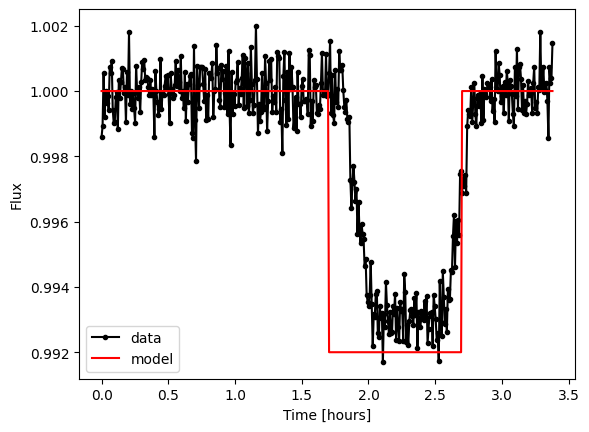

In [13]:
time_obs = det["HJD"]# store the HJD data as the times
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour# put the time in hours
flux_obs = det["Relative_Flux"]# store the relative flux column in the flux_obs array
plt.plot(time_obs, flux_obs, marker=".", color="black", label="data") #plot the data in black
plt.plot(time_obs, flux_arr, linestyle="-", color="red", label="model") # plot the original model we created earlier in red on top of the plotted data
plt.xlabel("Time [hours]") # print the x-axis label
plt.ylabel("Flux") #print the y-axis label
plt.legend()# create a legend for the printed graphs

plt.show() # show the graph
